In [2]:
import os

# Import pca
import dotenv
import torch
from motornet.effector import RigidTendonArm26
from motornet.muscle import MujocoHillMuscle
from ctd.comparison.analysis.tt.tasks.tt_RandomTarget import TT_RandomTarget
from ctd.task_modeling.task_env.task_env import RandomTarget
from ctd.task_modeling.datamodule.task_datamodule import TaskDataModule
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.linear_model import LinearRegression


dotenv.load_dotenv(dotenv.find_dotenv())

True

In [5]:
HOME_DIR = os.environ["HOME_DIR"]
print(HOME_DIR)
pathTT = (
    HOME_DIR
    + "content/trained_models/task-trained/20240518_RandomTarget_NODE_Embed_Final/max_epochs=1500 latent_size=4 seed=0 learning_rate=0.0004/"
)
an_TT = TT_RandomTarget(run_name="TT", filepath=pathTT)
print(an_TT)
dm = an_TT.datamodule
model = an_TT.model


/home/csverst/Github/CtDBenchmark/


In [16]:

self = an_TT
tt_ics, tt_inputs, tt_targets = self.get_model_inputs()
inputs_to_env = self.get_inputs_to_env()

tt_extra = self.get_extra_inputs()
out_dict = self.wrapper(tt_ics, tt_inputs, inputs_to_env=inputs_to_env)
controlled = out_dict["controlled"]
states = out_dict["states"]
latents = out_dict["latents"]

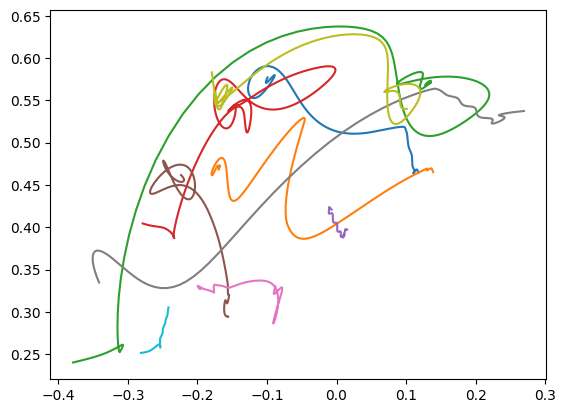

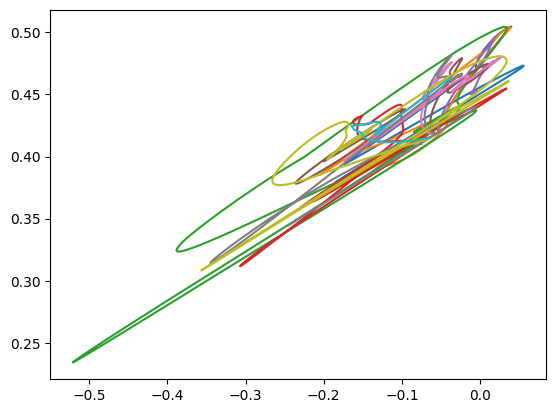

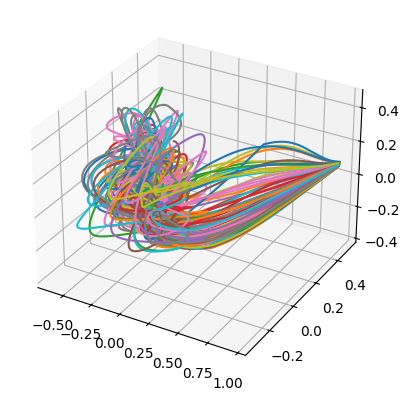

In [19]:
latents_flat = latents.view(-1, latents.shape[-1]).detach().cpu().numpy()
controlled_flat = controlled.view(-1, controlled.shape[-1]).detach().cpu().numpy()

pos_decoder = LinearRegression()
controlled1 = controlled.detach().cpu().numpy()

pos_decoder.fit(latents_flat, controlled_flat)
pred_pos = pos_decoder.predict(latents_flat)
pred_pos = pred_pos.reshape(controlled1.shape[0], controlled1.shape[1], -1)

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(10):
    ax.plot(controlled1[i, :, 0], controlled1[i, :, 1])
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(10):
    ax.plot(pred_pos[i, :, 0], pred_pos[i, :, 1])

pca = PCA()
pca.fit(latents_flat)
lat_pcs = pca.transform(latents_flat)
lat_pcs = lat_pcs.reshape(latents.shape[0], latents.shape[1], -1)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for i in range(100):
    ax.plot(lat_pcs[i, :, 0], lat_pcs[i, :, 1], lat_pcs[i, :, 2])
